# 2023-02-06

In [1]:
from typing import Dict, List
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/dqmis/github/code_academy_ai_course/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
words = open("./datasets/name.txt").read().splitlines()

In [3]:
len(words)

32033

In [4]:
min(len(word) for word in words)

2

In [5]:
max(len(word) for word in words)

15

Building bigrams

In [6]:
# dominykas bigrams are: do, om, mi, in, ny, yk, ka, as

for w in ["dominykas"]:
    print(w)
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

dominykas
<S> d
d o
o m
m i
i n
n y
y k
k a
a s
s <E>


In [7]:
# builind a bigram dictionary
bigrams: Dict[str, int] = {}

for w in words[:3]:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigrams[(ch1, ch2)] = bigrams.get((ch1, ch2), 0) + 1

In [8]:
print(words[:3])
bigrams

['emma', 'olivia', 'ava']


{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [9]:
bigrams: Dict[str, int] = {}

for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigrams[(ch1, ch2)] = bigrams.get((ch1, ch2), 0) + 1

In [10]:
bigrams

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [11]:
sorted(bigrams.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [12]:
len(set("".join(words)))

26

In [13]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [14]:
chars = sorted(list(set("".join(words))))
stoi = {s: i for i, s in enumerate(chars)}

In [15]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [16]:
stoi["<S>"] = 26
stoi["<E>"] = 27

In [17]:
for w in words:
    chs: List[str] = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

N.shape

torch.Size([28, 28])

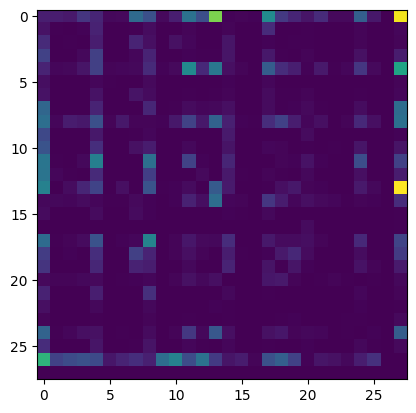

In [18]:
plt.imshow(N)

<AxesSubplot: >

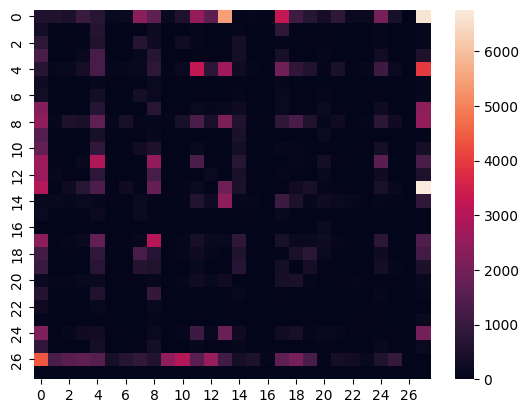

In [19]:
sns.heatmap(N)

In [20]:
itos = {i: s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

(-0.5, 27.5, 27.5, -0.5)

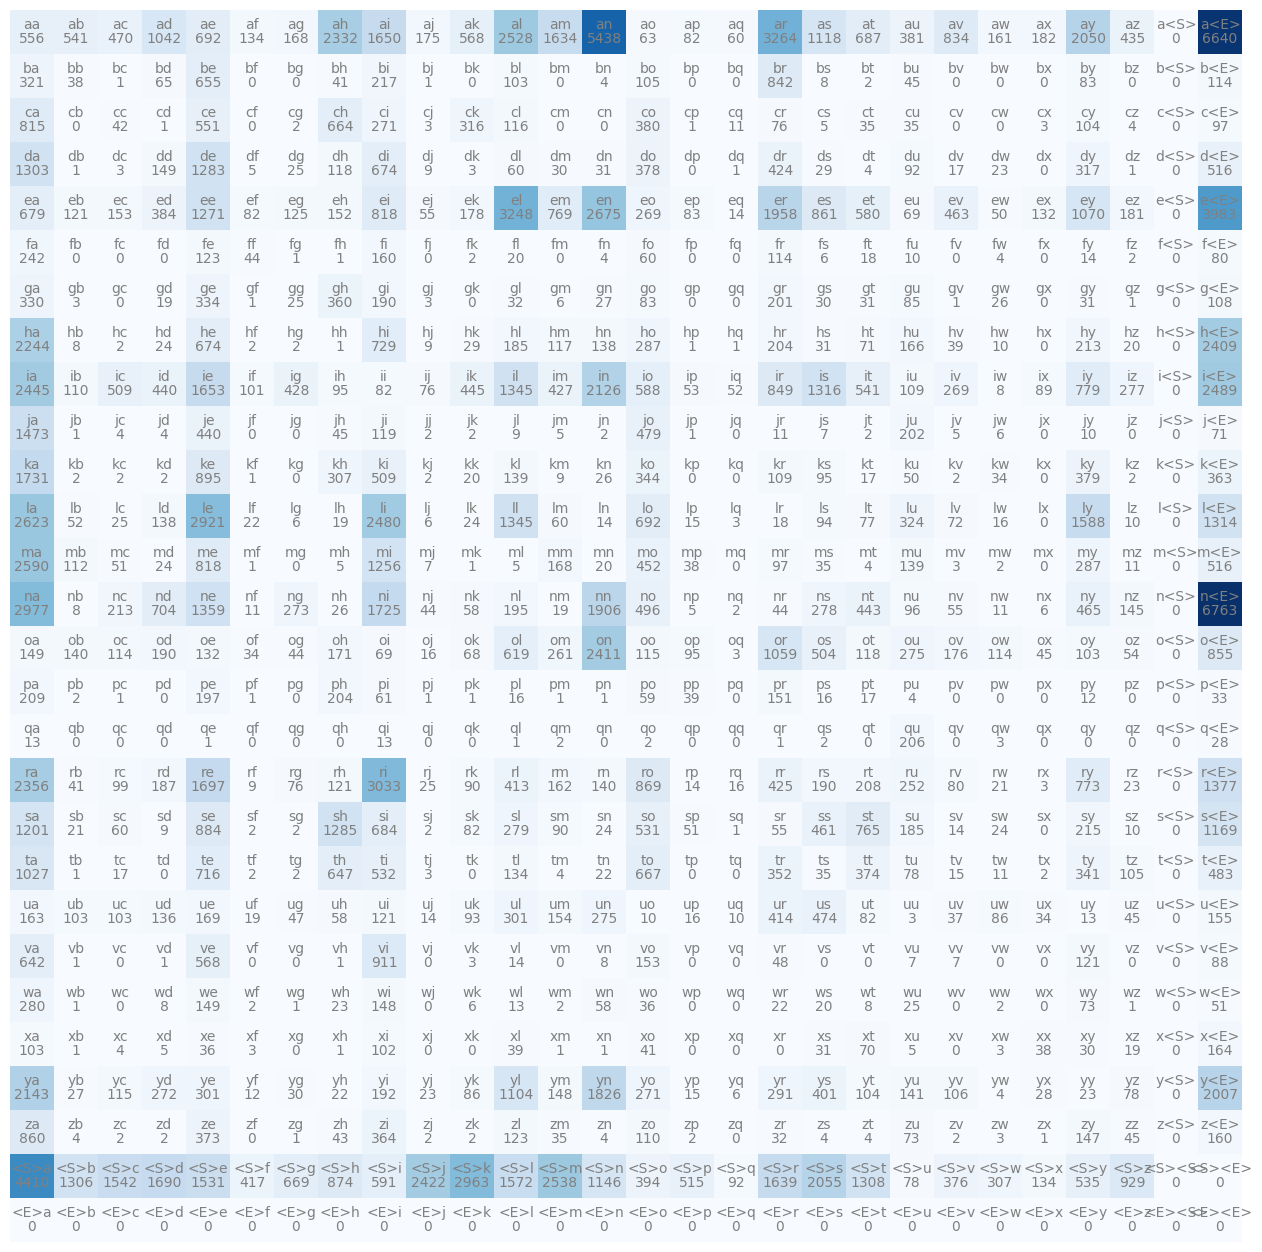

In [21]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [22]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}

In [23]:
for w in words:
    chs: List[str] = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

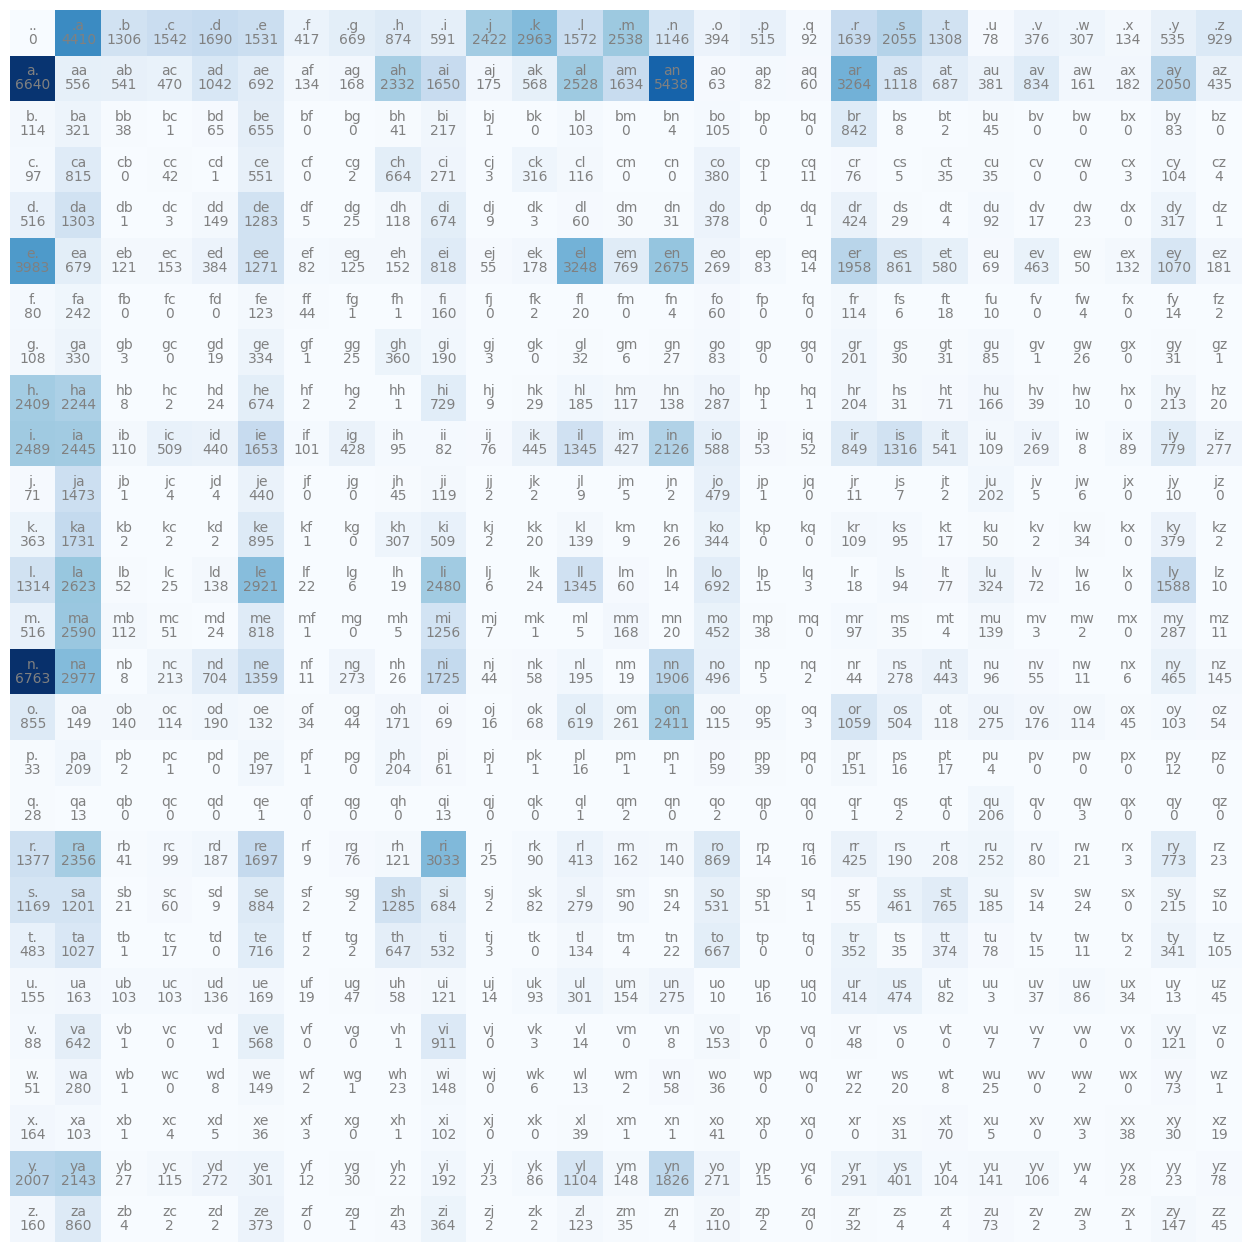

In [24]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [25]:
balls_in_the_baset = {"r": 2, "g": 3, "m": 1, "j": 2}
balls_in_the_baset_count = sum(balls_in_the_baset.values())
p_draw_ball = {k: v / balls_in_the_baset_count for k, v in balls_in_the_baset.items()}
p_draw_ball

{'r': 0.25, 'g': 0.375, 'm': 0.125, 'j': 0.25}

In [26]:
sum_arr = np.zeros(4)
for i in range(10000):
    sum_arr += np.random.multinomial(1, list(p_draw_ball.values()))
sum_arr / sum_arr.sum()

array([0.2424, 0.3803, 0.1234, 0.2539])

In [27]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [28]:
q = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=q)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [29]:
torch.multinomial(p, num_samples=20, generator=q, replacement=True)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [30]:
p = N[0].float()
p /= p.sum()
p

q = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, generator=q, replacement=True)
itos[ix.item()]

'm'

In [31]:
ix = torch.multinomial(p, num_samples=1, generator=q, replacement=True)
itos[ix.item()]

's'

In [32]:
P = N.float()
P /= P.sum(1, keepdim=True)

(-0.5, 26.5, 26.5, -0.5)

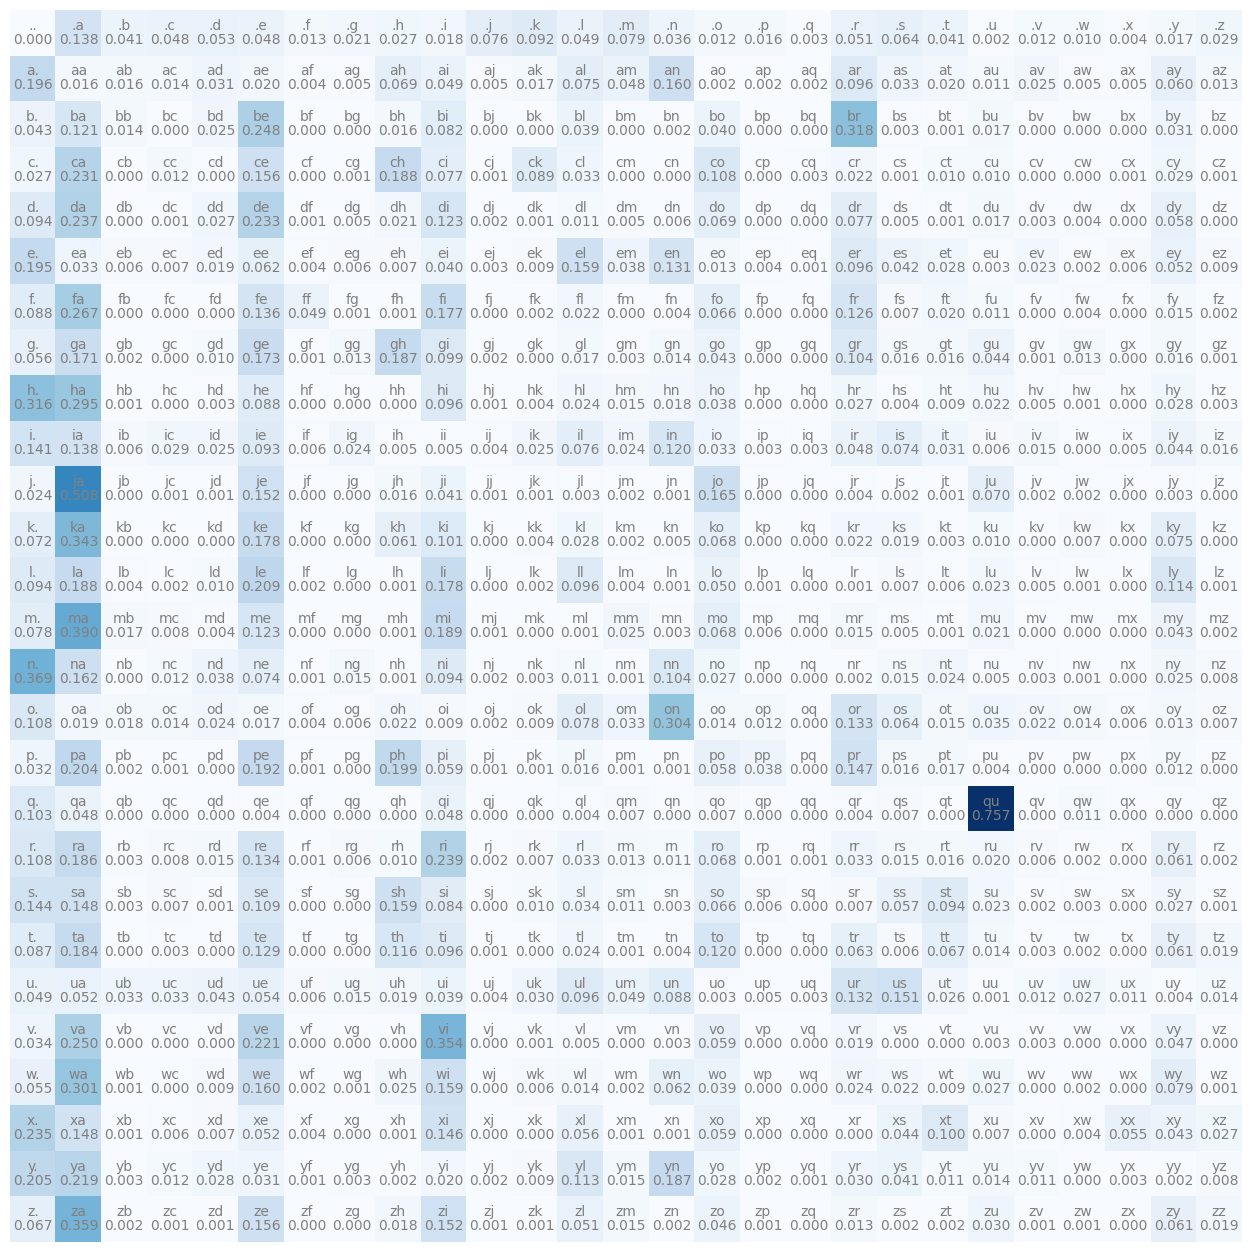

In [33]:
plt.figure(figsize=(16, 16))
plt.imshow(P, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{P[i, j].item():.3f}", ha="center", va="top", color="gray")
plt.axis("off")

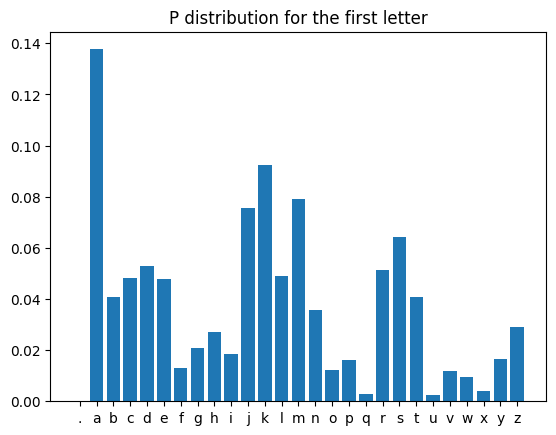

In [34]:
plt.bar(range(27), P[0])
plt.xticks(range(27), sorted(itos.values()), rotation=0)
plt.title("P distribution for the first letter")
plt.show()

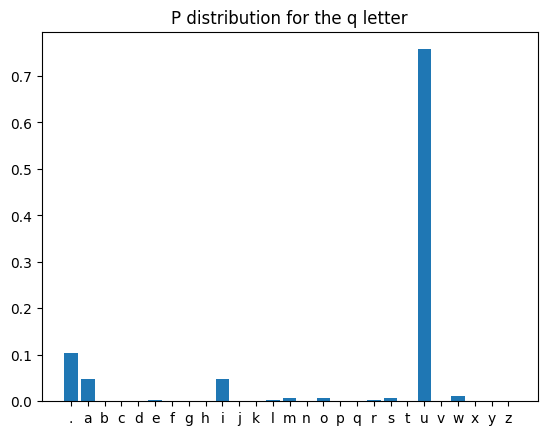

In [35]:
plt.bar(range(27), P[17])
plt.xticks(range(27), sorted(itos.values()), rotation=0)
plt.title("P distribution for the q letter")
plt.show()

In [36]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out: List[str] = []
    ix = 0
    while True:
        p = N[ix].float()
        p /= p.sum()
        ix = torch.multinomial(p, num_samples=1, generator=g, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [37]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out: List[str] = []
    ix = 0
    while True:
        p = N[ix].float()
        p /= p.sum()
        while True:
            ix = torch.multinomial(p, num_samples=1, generator=g, replacement=True).item()
            if ix == 0 and len(out) < 3:
                continue
            break
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
haninatien.
egushl.
hra.
jayn.
ilemannariaenien.
beg.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.
torrederahnn.
ellovyllobrpin.
aya.
kna.


In [38]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out: List[str] = []
    ix = 0
    while True:
        p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, generator=g, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

qvsaayxbqrqmyqwuznivanukotdjvdhd.
qnoymtzduqkatdetkpfjdgigvlejfkrsqlwnirghhzwlu.
idcx.
cekmzucjnjoeovjvrggqrjr.
cfbhabkslpokc.
xtxwbpmknuusxdgzfexhwqpldpdnwzvkyxsqjforqqpfxstwkfoufhvwfhmsuyyotvcvvqpfcbydjcouhkajkhqnnpqmmllaordqy.
gszpw.
zlgijinangzzuulsyvqrufuawavsdbnwvlmrypvgrsfgpshgnmwafqmsjdvbhngvoiigxhkwdltrdkwnagzyknqv.
lfstdqigvncdoidetsukgdp.
cfpjsxeqjcsmjwguzes.
woflfjxflylgbegpjdpovdtw.
dlzysqtrbhxhcdneiuum.
xtyslfbmaboaanyjpojuujflcsaucqcgtjmlzqtbaisvxrtgupkppigxudejdzsroqeigovuxmvt.
jlxfolkozci.
tkhdivkdifaxcevlpktkwwvuxlymtwylgpzauwdvxfvbooflddphmjeomjgjcqeqwt.
.
wlxclcjbm.
quuyijtnzmycshclormjyrerqslomdrlbuwqnlmitbrmqhtbdwbyvlsmwnborwcdhjotezwnsxuvffvinrmedelubhdfgtavxqfgmnyqrygyevxaapbjtnwfnwewqxerdytttvfo.
iauarz.
tynoqkyp.


Let's talks about LOSS

In [39]:
for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f"{ch1}{ch2}: {prob:.3f}")

.e: 0.048
em: 0.038
mm: 0.025
ma: 0.390
a.: 0.196
.o: 0.012
ol: 0.078
li: 0.178
iv: 0.015
vi: 0.354
ia: 0.138
a.: 0.196
.a: 0.138
av: 0.025
va: 0.250
a.: 0.196


In [40]:
a = np.array([1, 1, 2, 3, 4, 5, 6])
a / sum(a)

array([0.04545455, 0.04545455, 0.09090909, 0.13636364, 0.18181818,
       0.22727273, 0.27272727])

In [41]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [42]:
P = N.float()
P /= P.sum(1)
P.shape

torch.Size([27, 27])

In [43]:
P = N.float()
P.sum(1, keepdim=True).shape

torch.Size([27, 1])

In [44]:
P = N.float()
P.sum(1).shape

torch.Size([27])

In [45]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out: List[str] = []
    ix = 0
    while True:
        ix = torch.multinomial(P[ix], num_samples=1, generator=g, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [46]:
a = torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

In [47]:
a.sum(1, keepdim=False).shape

torch.Size([2])

In [48]:
P.sum(1, keepdim=True)

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [49]:
a = torch.tensor(np.array([1, 1, 2, 3, 4, 5, 6], dtype=np.float32))
a.dtype

torch.float32

In [50]:
a = torch.Tensor(np.array([1, 1, 2, 3, 4, 5, 6], dtype=np.int32))
a

tensor([1., 1., 2., 3., 4., 5., 6.])

In [51]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [52]:

for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        print(f"{ch1}{ch2}: {log_prob:.3f}")


.e: -3.041
em: -3.279
mm: -3.677
ma: -0.942
a.: -1.630
.o: -4.398
ol: -2.551
li: -1.728
iv: -4.187
vi: -1.038
ia: -1.980
a.: -1.630
.a: -1.983
av: -3.704
va: -1.388
a.: -1.630


In [53]:
log_likelihood = 0.0
n = 0

for w in words[:3]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.e: -3.041
em: -3.279
mm: -3.677
ma: -0.942
a.: -1.630
.o: -4.398
ol: -2.551
li: -1.728
iv: -4.187
vi: -1.038
ia: -1.980
a.: -1.630
.a: -1.983
av: -3.704
va: -1.388
a.: -1.630
log_likelihood: -38.786
neg_log_likelihood: 38.786
Neg log likelihood normalized: 2.424


In [54]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [55]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.e: -3.041
em: -3.279
mm: -3.677
ma: -0.942
a.: -1.630
.o: -4.398
ol: -2.551
li: -1.728
iv: -4.187
vi: -1.038
ia: -1.980
a.: -1.630
.a: -1.983
av: -3.704
va: -1.388
a.: -1.630
.i: -3.993
is: -2.599
sa: -1.909
ab: -4.137
be: -1.396
el: -1.839
ll: -2.340
la: -1.672
a.: -1.630
.s: -2.746
so: -2.726
op: -4.425
ph: -1.615
hi: -2.346
ia: -1.980
a.: -1.630
.c: -3.034
ch: -1.671
ha: -1.222
ar: -2.340
rl: -3.426
lo: -3.004
ot: -4.208
tt: -2.701
te: -2.051
e.: -1.635
.m: -2.535
mi: -1.665
ia: -1.980
a.: -1.630
.a: -1.983
am: -3.032
me: -2.094
el: -1.839
li: -1.728
ia: -1.980
a.: -1.630
.h: -3.601
ha: -1.222
ar: -2.340
rp: -6.810
pe: -1.650
er: -2.345
r.: -2.222
.e: -3.041
ev: -3.787
ve: -1.511
el: -1.839
ly: -2.174
yn: -1.678
n.: -0.997
.a: -1.983
ab: -4.137
bi: -2.501
ig: -3.722
ga: -1.765
ai: -3.022
il: -2.577
l.: -2.363
.e: -3.041
em: -3.279
mi: -1.665
il: -2.577
ly: -2.174
y.: -1.583
.e: -3.041
el: -1.839
li: -1.728
iz: -4.157
za: -1.025
ab: -4.137
be: -1.396
et: -3.561
th: -2.153
h.: -1.151

In [56]:
log_likelihood = 0.0
n = 0

for w in ["sarah"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.s: -2.746
sa: -1.909
ar: -2.340
ra: -1.685
ah: -2.676
h.: -1.151
log_likelihood: -12.508
neg_log_likelihood: 12.508
Neg log likelihood normalized: 2.085


In [57]:
log_likelihood = 0.0
n = 0

for w in ["dominykas"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.d: -2.942
do: -2.677
om: -3.414
mi: -1.665
in: -2.119
ny: -3.674
yk: -4.733
ka: -1.069
as: -3.411
s.: -1.936
log_likelihood: -27.642
neg_log_likelihood: 27.642
Neg log likelihood normalized: 2.764


In [58]:
log_likelihood = 0.0
n = 0

for w in ["smith"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.s: -2.746
sm: -4.501
mi: -1.665
it: -3.488
th: -2.153
h.: -1.151
log_likelihood: -15.704
neg_log_likelihood: 15.704
Neg log likelihood normalized: 2.617


In [59]:
log_likelihood = 0.0
n = 0

for w in ["andrew"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.a: -1.983
an: -1.830
nd: -3.259
dr: -2.562
re: -2.013
ew: -6.012
w.: -2.902
log_likelihood: -20.561
neg_log_likelihood: 20.561
Neg log likelihood normalized: 2.937


In [60]:
log_likelihood = 0.0
n = 0

for w in ["andrewq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.a: -1.983
an: -1.830
nd: -3.259
dr: -2.562
re: -2.013
ew: -6.012
wq: -inf
q.: -2.274
log_likelihood: -inf
neg_log_likelihood: inf
Neg log likelihood normalized: inf


### Smoothing

(-0.5, 26.5, 26.5, -0.5)

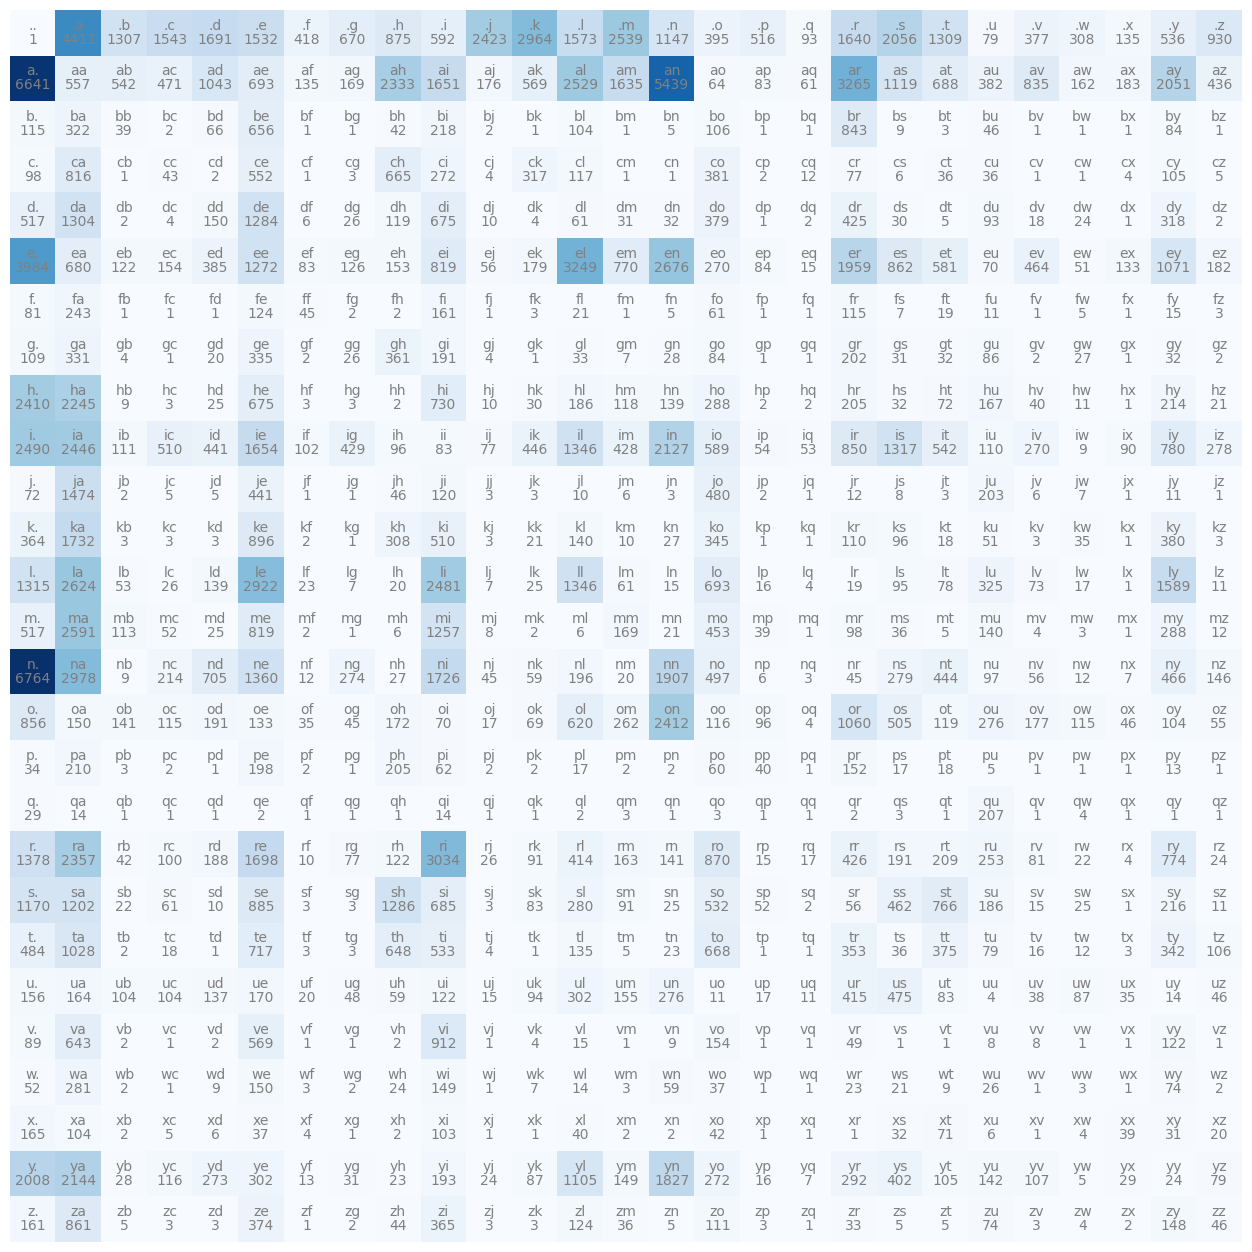

In [61]:
N = torch.zeros((27, 27), dtype=torch.int32)

smooth_val = 1

N += smooth_val

for w in words:
    chs: List[str] = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

P = N.float()
P /= P.sum(1, keepdim=True)

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis("off")


In [62]:
log_likelihood = 0.0
n = 0

for w in ["andrewq"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        log_prob = torch.log(prob)
        n +=1   
        log_likelihood += log_prob
        print(f"{ch1}{ch2}: {log_prob:.3f}")

print(f"log_likelihood: {log_likelihood:.3f}")
print(f"neg_log_likelihood: {-log_likelihood:.3f}")
print(f"Neg log likelihood normalized: {-log_likelihood / n:.3f}")

.a: -1.984
an: -1.830
nd: -3.259
dr: -2.565
re: -2.014
ew: -5.994
wq: -6.863
q.: -2.333
log_likelihood: -26.842
neg_log_likelihood: 26.842
Neg log likelihood normalized: 3.355


(-0.5, 26.5, 26.5, -0.5)

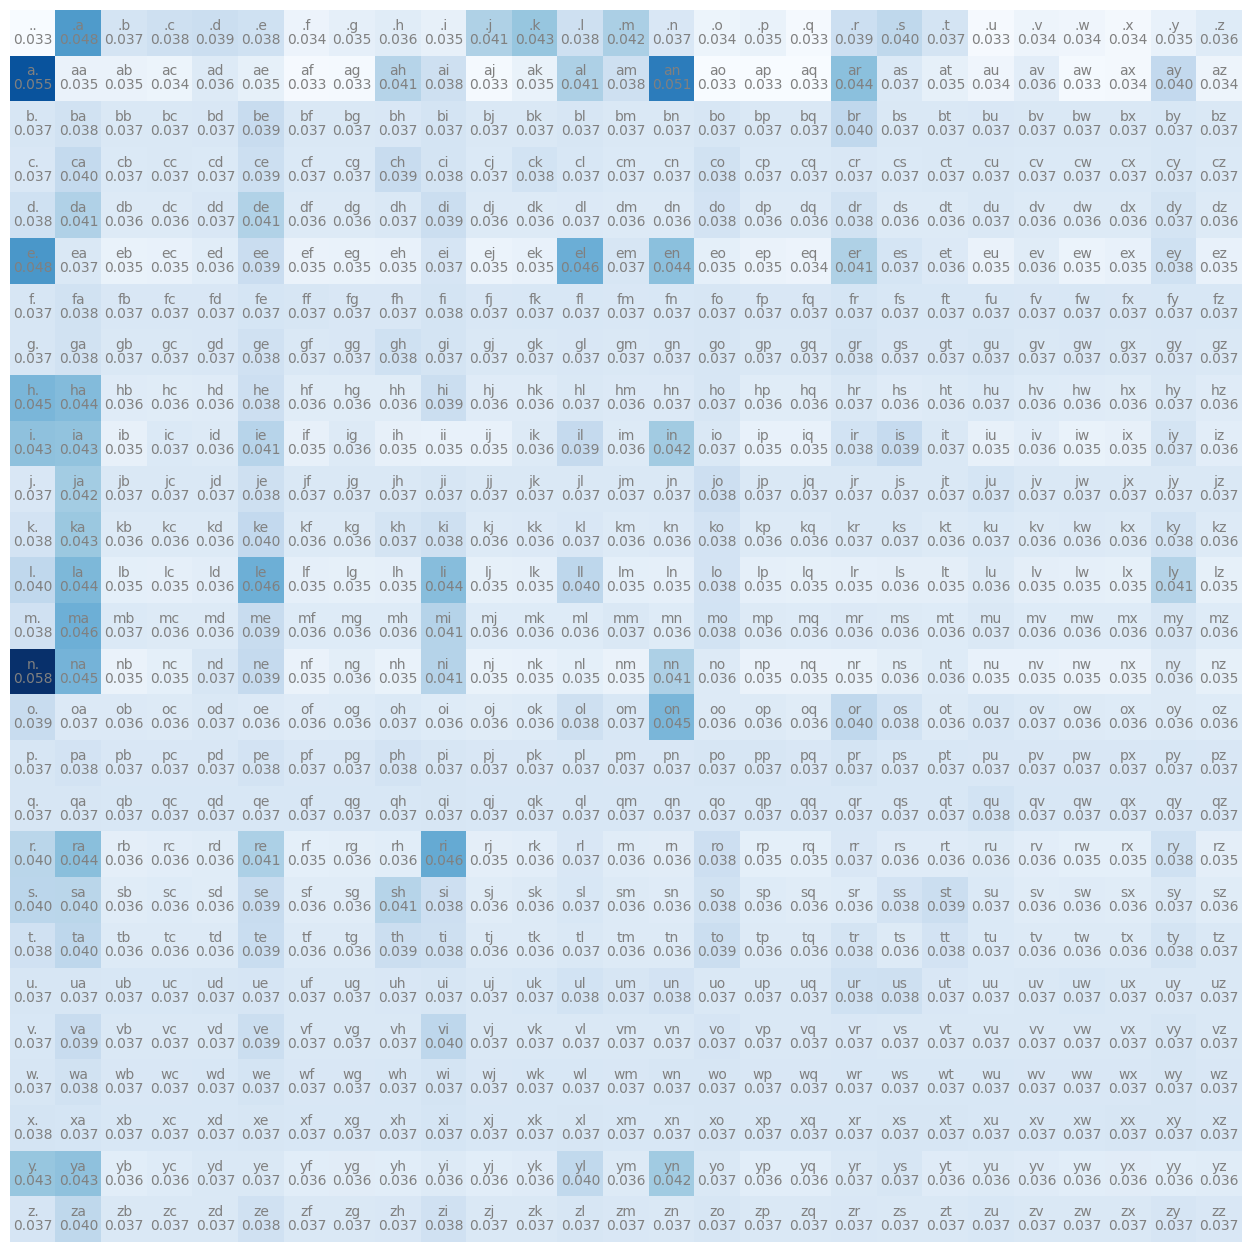

In [63]:
N = torch.zeros((27, 27), dtype=torch.int32)

smooth_val = 10000

N += smooth_val

for w in words:
    chs: List[str] = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

P = N.float()
P /= P.sum(1, keepdim=True)

plt.figure(figsize=(16, 16))
plt.imshow(P, cmap="Blues")
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, f"{P[i, j].item():.3f}", ha="center", va="top", color="gray")
plt.axis("off")


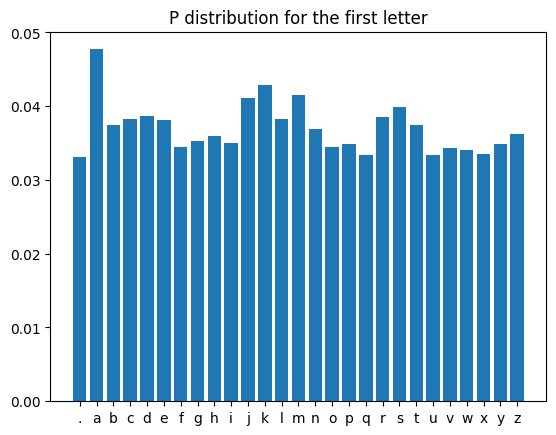

In [64]:
plt.bar(range(27), P[0])
plt.xticks(range(27), sorted(itos.values()), rotation=0)
plt.title("P distribution for the first letter")
plt.show()

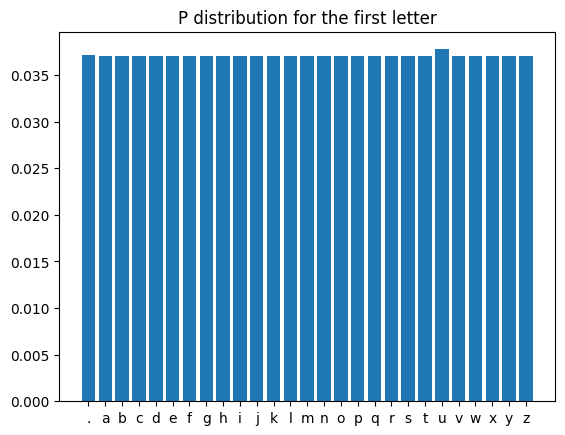

In [65]:
plt.bar(range(27), P[17])
plt.xticks(range(27), sorted(itos.values()), rotation=0)
plt.title("P distribution for the first letter")
plt.show()

## Neural Net

In [66]:
xs, ys = [], []

for w in words[:1]:
    chs: List[str] = ["."] + list(w) + ["."]
    print(chs)
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(xs)
print(ys)

['.', 'e', 'm', 'm', 'a', '.']
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [67]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [68]:
xenc.shape

torch.Size([5, 27])

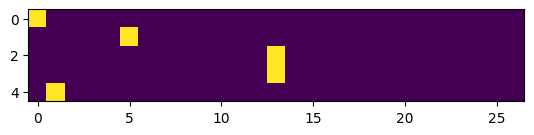

In [69]:
plt.imshow(xenc)

In [70]:
xenc.dtype

torch.int64

In [71]:
xenc = xenc.float()

In [72]:
xenc.dtype

torch.float32

In [73]:
W = torch.randn(27, 1)
W

tensor([[-0.8929],
        [ 0.5359],
        [ 0.3226],
        [ 1.2717],
        [-1.9386],
        [ 0.8915],
        [-0.1713],
        [ 0.2411],
        [ 2.0007],
        [-0.7193],
        [-0.8908],
        [ 0.8280],
        [ 0.5048],
        [ 0.0750],
        [ 1.9426],
        [-0.9315],
        [-0.4772],
        [ 1.2558],
        [-0.1512],
        [ 0.2989],
        [ 1.0343],
        [ 0.2824],
        [ 1.3756],
        [-2.2299],
        [ 1.2176],
        [ 0.3302],
        [ 0.6206]])

In [74]:
xenc @ W

tensor([[-0.8929],
        [ 0.8915],
        [ 0.0750],
        [ 0.0750],
        [ 0.5359]])

In [75]:
broad = xenc * W.T # broadcasting
broad.sum(1, keepdim=True)

tensor([[-0.8929],
        [ 0.8915],
        [ 0.0750],
        [ 0.0750],
        [ 0.5359]])

In [76]:
xenc @ W == (xenc * W.T).sum(1, keepdim=True)

tensor([[True],
        [True],
        [True],
        [True],
        [True]])

In [77]:
W = torch.randn(27, 27)
xenc @ W

tensor([[-2.4321, -0.9078,  2.5841, -0.6206, -0.1685,  0.0790,  0.8006,  0.4778,
          0.8870,  1.4394,  0.2102, -0.9629, -0.8605, -2.0050,  1.8766,  0.0347,
          0.7729, -1.3415,  0.6606,  2.4731,  0.0879, -1.0123, -1.2920,  0.3653,
          0.4025, -0.0983, -0.9787],
        [-0.8356,  1.0351, -1.5290, -0.0321, -0.4502, -0.9564,  0.6299,  1.5324,
         -0.4544, -2.0711, -0.1062,  0.5352,  0.5960, -1.1987, -1.8603,  0.5364,
         -0.9011,  2.0051, -0.2965, -0.5783,  1.3675, -1.2218, -1.1329,  0.3340,
          1.8807, -0.1534, -0.5392],
        [ 0.3431, -0.8353, -1.2259,  0.2528,  0.5247, -0.5585,  0.2764,  1.2900,
         -0.4740,  0.6468,  2.6341,  0.3538, -1.2136, -2.1351,  2.0092,  1.1230,
         -0.1091, -0.4866, -0.7354,  0.9855,  1.4177,  0.4925,  0.6791, -0.3548,
          2.2238,  0.7519, -1.5099],
        [ 0.3431, -0.8353, -1.2259,  0.2528,  0.5247, -0.5585,  0.2764,  1.2900,
         -0.4740,  0.6468,  2.6341,  0.3538, -1.2136, -2.1351,  2.0092,  1.1230

In [78]:
(xenc @ W).shape

torch.Size([5, 27])

In [79]:
(xenc @ W)[3, 13]

tensor(-2.1351)

In [80]:
logits = xenc @ W
count = logits.exp()
prob = count / count.sum(1, keepdim=True)

![](https://camo.githubusercontent.com/8320082cfcf91fc8e8e55e5c8b748efe3e6d98cd2a01f840a6218cc780941a38/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313430302f312a5265597064495a335a53415062325738634a706b42672e6a706567)

In [81]:
prob.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [82]:
prob[0]

tensor([0.0015, 0.0069, 0.2261, 0.0092, 0.0144, 0.0185, 0.0380, 0.0275, 0.0414,
        0.0720, 0.0211, 0.0065, 0.0072, 0.0023, 0.1114, 0.0177, 0.0370, 0.0045,
        0.0330, 0.2024, 0.0186, 0.0062, 0.0047, 0.0246, 0.0255, 0.0155, 0.0064])

In [83]:
nils = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("-------")
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})")
    print(f"Input to network: {x}")
    p = prob[i, y]
    print(f"Output from network: {prob[i,]}")
    print(f"Label: {y}")
    logp = torch.log(p)
    print(f"logp: {logp}")
    nll = -logp
    print(f"nll: {nll}")
    nils[i] = nll

print("-------")
print(f"Average NLL: {nils.mean()}")

-------
bigram example 1: .e (indexes 0, 5)
Input to network: 0
Output from network: tensor([0.0015, 0.0069, 0.2261, 0.0092, 0.0144, 0.0185, 0.0380, 0.0275, 0.0414,
        0.0720, 0.0211, 0.0065, 0.0072, 0.0023, 0.1114, 0.0177, 0.0370, 0.0045,
        0.0330, 0.2024, 0.0186, 0.0062, 0.0047, 0.0246, 0.0255, 0.0155, 0.0064])
Label: 5
logp: -3.9918103218078613
nll: 3.9918103218078613
-------
bigram example 2: em (indexes 5, 13)
Input to network: 5
Output from network: tensor([0.0102, 0.0664, 0.0051, 0.0228, 0.0150, 0.0091, 0.0443, 0.1092, 0.0150,
        0.0030, 0.0212, 0.0403, 0.0428, 0.0071, 0.0037, 0.0403, 0.0096, 0.1752,
        0.0175, 0.0132, 0.0926, 0.0070, 0.0076, 0.0329, 0.1547, 0.0202, 0.0138])
Label: 13
logp: -4.945613861083984
nll: 4.945613861083984
-------
bigram example 3: mm (indexes 13, 13)
Input to network: 13
Output from network: tensor([0.0220, 0.0068, 0.0046, 0.0201, 0.0263, 0.0089, 0.0205, 0.0566, 0.0097,
        0.0298, 0.2171, 0.0222, 0.0046, 0.0018, 0.1162, 0.0479

In [84]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2149483657)
W = torch.randn((27, 27), generator=g)

In [85]:
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [86]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()  # input character index
    y = ys[i].item()  # label character index
    print("--------")
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})")
    print("input to the neural net:", x)
    print("output probabilities from the neural net:", probs[i])
    print("label (actual next character):", y)
    p = probs[i, y]
    print("probability assigned by the net to the the correct character:", p.item())
    logp = torch.log(p)
    print("log likelihood:", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("=========")
print("average negative log likelihood, i.e. loss =", nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0356, 0.0147, 0.0253, 0.0174, 0.0178, 0.0109, 0.0718, 0.0088, 0.0413,
        0.0038, 0.0077, 0.0114, 0.1119, 0.0479, 0.0484, 0.0300, 0.0832, 0.0104,
        0.1045, 0.0264, 0.0821, 0.0103, 0.0170, 0.0778, 0.0036, 0.0511, 0.0288])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.0108892060816288
log likelihood: -4.519983291625977
negative log likelihood: 4.519983291625977
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0170, 0.0236, 0.0080, 0.0328, 0.0088, 0.0267, 0.0366, 0.0288, 0.0036,
        0.1323, 0.0453, 0.0111, 0.0127, 0.0468, 0.0136, 0.1153, 0.0138, 0.0340,
        0.0046, 0.0054, 0.0177, 0.0912, 0.0286, 0.0783, 0.0912, 0.0378, 0.0344])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.0

In [87]:
xs

tensor([ 0,  5, 13, 13,  1])

In [88]:
ys

tensor([ 5, 13, 13,  1,  0])

In [89]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2149483657)
W = torch.randn((27, 27), generator=g)

In [90]:
g = torch.Generator().manual_seed(2149483657)
W = torch.randn((27, 27), generator=g)

xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts

In [91]:
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character

In [92]:
torch.tensor(30).exp()

tensor(1.0686e+13)

In [93]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character

In [94]:
probs.shape

torch.Size([5, 27])

In [95]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0109),
 tensor(0.0468),
 tensor(0.0164),
 tensor(0.1735),
 tensor(0.0164))

In [96]:
probs[[1, 2, 3], [0]]

tensor([0.0170, 0.0470, 0.0470])

In [97]:
probs[torch.arange(5), ys]

tensor([0.0109, 0.0468, 0.0164, 0.1735, 0.0164])

In [98]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.5101)

In [99]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

# forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [100]:
loss.item()

3.7693049907684326

In [101]:
W.grad = None
loss.backward()

In [102]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [103]:
W.grad.shape

torch.Size([27, 27])

In [104]:
W.shape

torch.Size([27, 27])

In [105]:
W.data -= 0.1 * W.grad

In [106]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [107]:
W.grad = None
loss.backward()

W.data -= 1 * W.grad

In [108]:
loss.item()

3.7492129802703857

In [109]:
xs, ys = [], []

for w in words:
    chs: List[str] = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()

print(xs.shape)
print(ys.shape)

torch.Size([228146])
torch.Size([228146])


In [110]:
num

228146

epoch   0: loss = 3.7449
epoch  10: loss = 2.6888
epoch  20: loss = 2.5727
epoch  30: loss = 2.5301
epoch  40: loss = 2.5087
epoch  50: loss = 2.4961
epoch  60: loss = 2.4880
epoch  70: loss = 2.4824
epoch  80: loss = 2.4783
epoch  90: loss = 2.4751


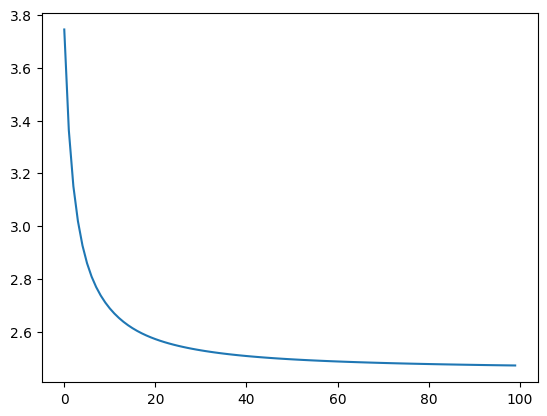

In [111]:
EPOCHS = 100
LR = 50

losses: List[float] = []
for k in range(EPOCHS):

    xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
    logits = xenc @ W  # predict log-counts
    counts = logits.exp()  # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean()
    losses.append(loss.item())
    if k % 10 == 0:
        print(f"epoch {k:3d}: loss = {loss.item():.4f}")

    # backprop
    W.grad = None
    loss.backward()

    # update weights
    W.data -= LR * W.grad

plt.plot(losses)

In [112]:
loss

tensor(2.4729, grad_fn=<NegBackward0>)

<BarContainer object of 27 artists>

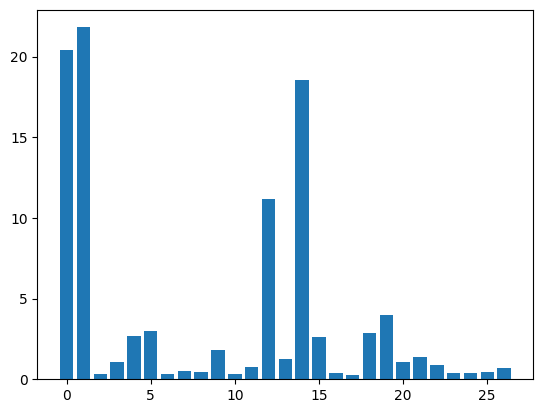

In [113]:
plt.bar(np.arange(0, 27), W.data.exp()[25])

epoch   0: loss = 2.4895
epoch  10: loss = 2.4882
epoch  20: loss = 2.4871
epoch  30: loss = 2.4863
epoch  40: loss = 2.4856
epoch  50: loss = 2.4850
epoch  60: loss = 2.4845
epoch  70: loss = 2.4841
epoch  80: loss = 2.4838
epoch  90: loss = 2.4834


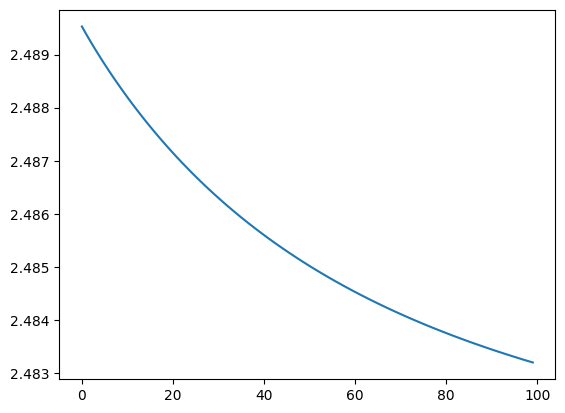

In [114]:
EPOCHS = 100
LR = 50
LBD = 0.01

losses: List[float] = []
for k in range(EPOCHS):

    xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
    logits = xenc @ W  # predict log-counts
    counts = logits.exp()  # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + LBD * W.pow(2).mean()
    losses.append(loss.item())
    if k % 10 == 0:
        print(f"epoch {k:3d}: loss = {loss.item():.4f}")

    # backprop
    W.grad = None
    loss.backward()

    # update weights
    W.data -= LR * W.grad

plt.plot(losses)

In [115]:
loss

tensor(2.4832, grad_fn=<AddBackward0>)

<BarContainer object of 27 artists>

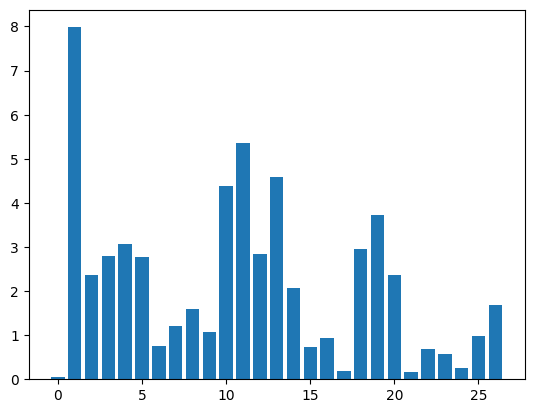

In [116]:
plt.bar(np.arange(0, 27), W.data.exp()[0])

In [124]:
def check_weight_dis(lbd: float) -> None:

    g = torch.Generator().manual_seed(2147483647)
    W = torch.randn((27, 27), generator=g, requires_grad=True)
    
    EPOCHS = 100
    LR = 50
    LBD = 0.01

    losses: List[float] = []
    for k in range(EPOCHS):

        xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
        logits = xenc @ W  # predict log-counts
        counts = logits.exp()  # counts, equivalent to N
        probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
        loss = -probs[torch.arange(num), ys].log().mean() + lbd * W.pow(2).mean()
        losses.append(loss.item())

        # backprop
        W.grad = None
        loss.backward()

        # update weights
        W.data -= LR * W.grad

    plt.plot(W.data.exp()[0], label=f"lambda={lbd}")

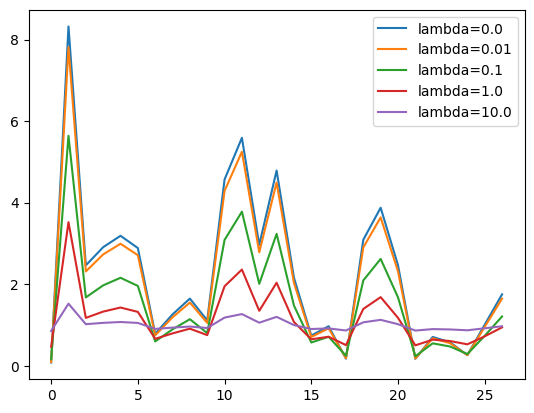

In [126]:
for lbd in [0.0, 0.01, 0.1, 1.0, 10.0]:
    check_weight_dis(lbd)
plt.legend()    
plt.show()

In [127]:
# Sample from the model
# ======================
# We sample from the model by repeatedly sampling from the multinomial distribution defined by the probabilities 
# output by the model. We start with a random character, and then sample the next character from the model's
# distribution. We repeat this process until we get a period.
g = torch.Generator().manual_seed(2147483647)

NUM_OF_WORDS = 5

for i in range(NUM_OF_WORDS):
    out: List[str] = []
    ix = 0
    while True:
        # ---
        # BEFORE:
        # p = P[ix]
        # ---
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        # ---

        ix = torch.multinomial(p, 1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

nro.
axxanlmiynstzmetamshjraisbgd.
ngnwmqzbtomaracrin.
jaehatjbicjqsonsleoiehyvis.
ha.


NN:
```
mor.
axx.
minaymoryles.
kondmaisah.
anchthizarie.
```

STAT:
```
mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
```